#Kaggle bike demand predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
bikes = pd.read_csv('./Downloads/hour.csv')

In [3]:
bikes.shape

(17379, 17)

In [4]:
bikes_prep = bikes.copy()

In [5]:
bikes_prep= bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [6]:
bikes_prep.shape

(17379, 13)

In [7]:
#basic check for missing value


In [8]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

In [9]:
#visualize the datausing histogram

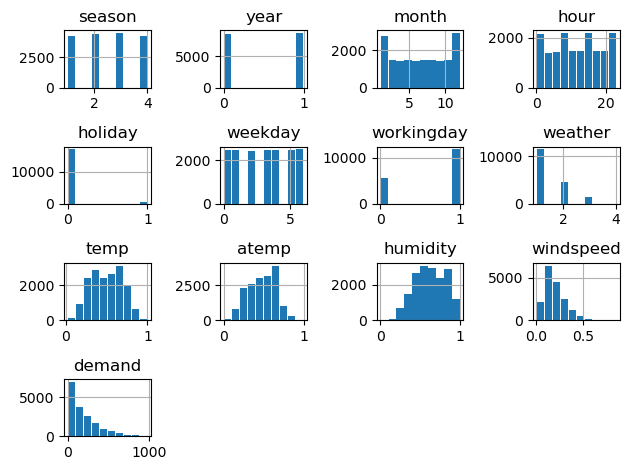

In [10]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [11]:
#data visualization\\visualize the contionus feature Vs demand


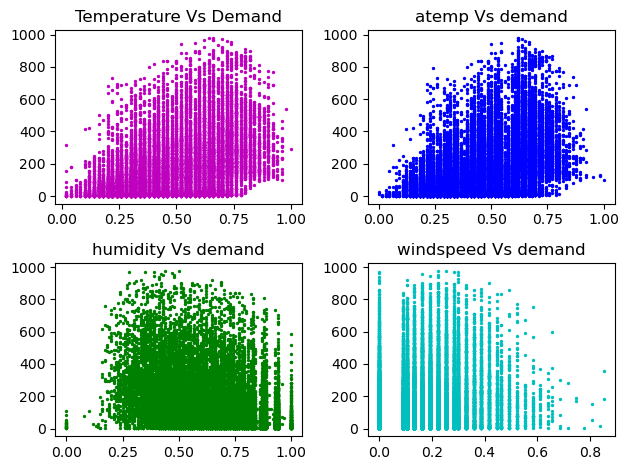

In [12]:
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2,c='m')




plt.subplot(2,2,2)
plt.title('atemp Vs demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2,c='b')


plt.subplot(2,2,3)
plt.title('humidity Vs demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2,c='g')


plt.subplot(2,2,4)
plt.title('windspeed Vs demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2,c='c')


plt.tight_layout()

In [13]:
#data visualization for categorial columns

In [14]:
#create unique season value

In [15]:
cat_list = bikes_prep['season'].unique()

In [16]:
#create average demand per person using grouply

In [17]:
cat_avg = bikes_prep.groupby('season').mean()['demand']

<BarContainer object of 4 artists>

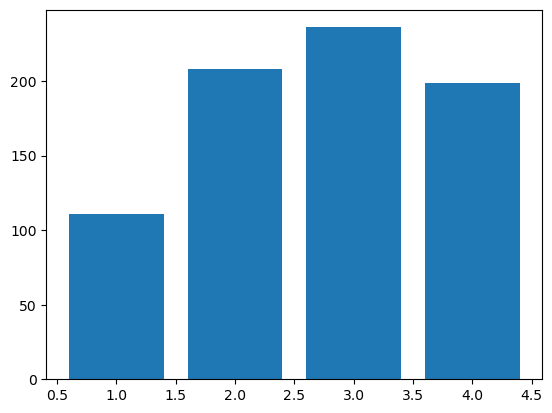

In [18]:
plt.bar(cat_list,cat_avg)

In [19]:
#create a 3x3 subplot

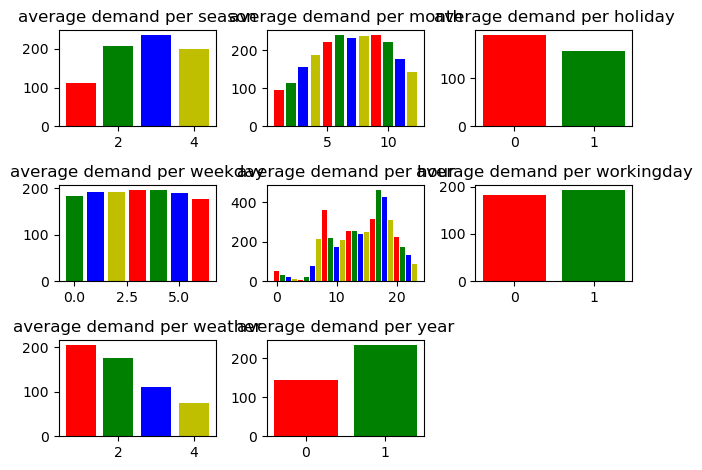

In [20]:
colors= ['r','g','b','y']
plt.subplot(3,3,1)
plt.title('average demand per season',)
plt.bar(cat_list,cat_avg,color=colors)


plt.subplot(3,3,2)
plt.title('average demand per month')
cat_list = bikes_prep['month'].unique()
cat_avg = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)


plt.subplot(3,3,3)
plt.title('average demand per holiday')
cat_list = bikes_prep['holiday'].unique()
cat_avg = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)



plt.subplot(3,3,4)
plt.title('average demand per weekday')
cat_list = bikes_prep['weekday'].unique()
cat_avg = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)


plt.subplot(3,3,5)
plt.title('average demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)



plt.subplot(3,3,6)
plt.title('average demand per workingday')
cat_list = bikes_prep['workingday'].unique()
cat_avg = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,7)
plt.title('average demand per weather')
cat_list = bikes_prep['weather'].unique()
cat_avg = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)


plt.subplot(3,3,8)
plt.title('average demand per year')
cat_list = bikes_prep['year'].unique()
cat_avg = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)



plt.tight_layout()

<BarContainer object of 24 artists>

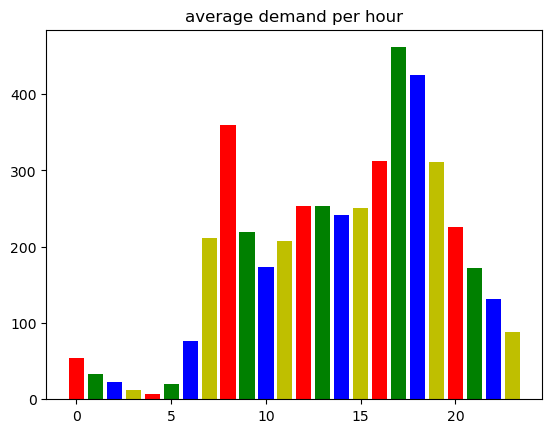

In [21]:

plt.title('average demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)

In [22]:
#check for outliers

In [23]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [24]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [25]:
#check multiple linear regression assumption

In [26]:
#linearity using correlation coefficeint  matrix using coer

In [27]:
correlation  = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [28]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [29]:
bikes_prep.shape


(17379, 8)

In [30]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [31]:
#check autocorelation in demand using acorr


In [32]:
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1f6b555ee00>)

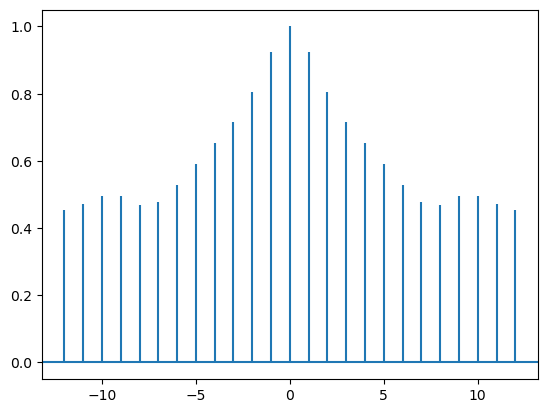

In [33]:
plt.acorr(df1, maxlags=12)

In [34]:
#log normalize the feature demand

<Axes: >

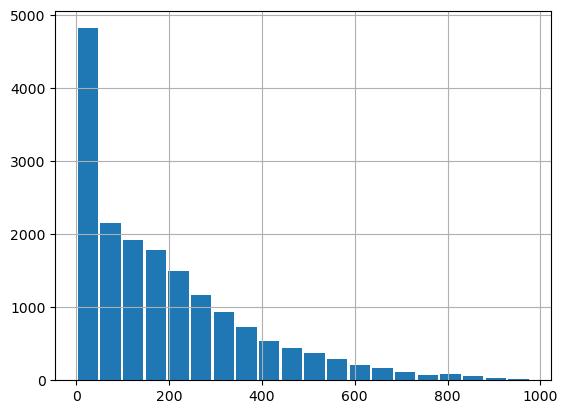

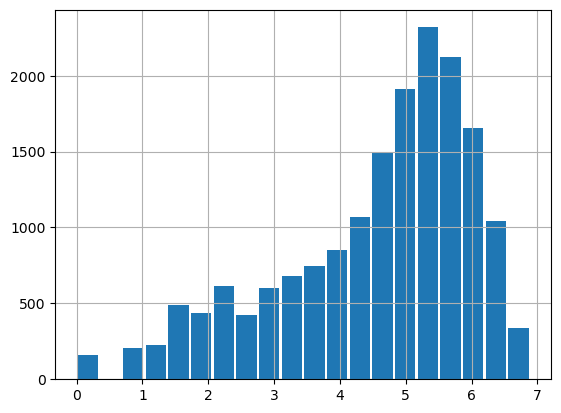

In [35]:
df1= bikes_prep['demand']
df2 = np.log(df1)


plt.figure()
df1.hist(rwidth=0.9,bins=20)


plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [36]:
bikes_prep['demand']= np.log(bikes_prep['demand'])

In [37]:
#autocorelation in the demand column

In [38]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']


bikes_prep_lag =pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [39]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [40]:
dummy_df = pd.get_dummies(bikes_prep_lag,drop_first=True)

In [41]:
dummy_df

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [42]:
bikes_prep_lag['season']= bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday']= bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']= bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month']= bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']= bikes_prep_lag['hour'].astype('category')

In [43]:
dummy_df = pd.get_dummies(bikes_prep_lag,drop_first=True)

In [44]:
dummy_df

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#demand is the time series and time dependant

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
x= bikes_prep_lag.drop(['demand'],axis=1)
y= bikes_prep_lag[['demand']]

In [47]:
#create the size for trainng data and test data for time series

tr_size = 0.7*len(x)
tr_size= int(tr_size)

In [48]:
x_train = x.values[0 :tr_size]
x_test = x.values[tr_size : len(x)]

y_train = y.values[0 : tr_size]
y_test = y.values[tr_size: len(y)]

In [49]:
# fit and score model
#linear regression

In [50]:
from sklearn.linear_model import LinearRegression

lrg= LinearRegression()

In [51]:
lrg.fit(x_train,y_train)

LinearRegression()

In [52]:
r2_train = lrg.score(x_train, y_train)
r2_test = lrg.score(x_test, y_test)

In [57]:
r2_train

0.8620985028863707

In [58]:
r2_test

0.8886718544254075

In [53]:
#create y prediction

y_predict = lrg.predict(x_test)

In [56]:
y_predict

array([[3.77892932],
       [3.37032491],
       [2.26903141],
       ...,
       [4.37274204],
       [4.50436858],
       [4.14107823]])

In [54]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [55]:
rmse

0.47611857756057624

In [59]:
#final step--RMSLE Value for Kaggle

In [61]:
y_test_e =[]
y_predict_e =[]

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
    
    

In [62]:
#do the sum and log for rmsle

In [64]:
log_sq_sum = 0.0
for i in range(0,len(y_test_e)):
    log_a      =   math.log(y_test_e[i] +1)
    log_p      =   math.log(y_predict_e[i] +1)
    log_diff   =   (log_p - log_a)**2
    log_sq_sum =    log_sq_sum +log_diff
    
rmsle = math.sqrt(log_sq_sum / len(y_test))   
print(rmsle)
    

0.45214002641705386
